## Importing Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt
from matplotlib import style
import pickle
import pylab as pl
import seaborn as sns
import scipy

## The Data

Започваме като запазваме файла с данните в pandas променлива.

In [2]:
df = pd.read_excel("DR-data-edit.xlsx")

In [3]:
print(f"Общ брой студенти: {len(df)}")

Общ брой студенти: 144


In [4]:
df['Оценка_'].describe()

count    144.000000
mean       2.430556
std        0.824899
min        2.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Оценка_, dtype: float64

In [5]:
df.columns # Проверяваме имената на колоните в набора от данни

Index(['Unnamed: 0', 'Факултетен номер', 'Лекция 1', 'Лекция 2', 'Лекция 3',
       'Упражнение 3', 'Решени задачи 3', 'Лекция 4', 'Упражнение 4',
       'Решени задачи 4', 'Лекция 5', 'Упражнение 5', 'Решени задачи 5',
       'Лекция 6', 'Упражнение 6', 'Решени задачи 6', 'Лекция 7',
       'Упражнение 7', 'Решени задачи 7', 'Лекция 8', 'Упражнение 8',
       'Решени задачи 8', 'Лекция 9', 'Упражнение 9', 'Решени задачи 9',
       'Лекция 10', 'Упражнение 10', 'Решени задачи 10', 'Лекция 11',
       'Упражнение 11', 'Решени задачи 11', 'Лекция 12', 'Упражнение 12',
       'Решени задачи 12', 'Бонус активност', 'Бонус задачи', 'Бонус общо',
       'Лекция -28.09', 'Седмица 1', 'Седмица 2', 'Седмица 3', 'Седмица 4',
       'Седмица 4 - активност', 'Седмица 5', 'Седмица 5 - активност',
       'Лекция 2.11', 'Седмица 6', 'Седмица 6 - активност', 'Седмица 8',
       'Седмица 8 - активност', 'Седмица 9', 'Седмица 9 - активност',
       'Седмица 10', 'Седмица 10 - активност', 'Седмица 11',
 

In [6]:
df.describe() # Проверяваме описанието на набора от данни

,Unnamed: 0,Факултетен номер,Лекция 1,Лекция 2,Лекция 3,Упражнение 3,Решени задачи 3,Лекция 4,Упражнение 4,Решени задачи 4,...,Общо точки,Оценка,Крайна оценка,Контролна_1,Тест_1,Контролна_2,Тест_2,Бонус_,Общо_точки,Оценка_
count,144.000000,1.440000e+02,82.0,51.0,60.0,80.0,83.000000,48.0,61.0,62.000000,...,144.000000,144.000000,122.000000,109.000000,105.000000,97.000000,100.000000,144.000000,144.000000,144.000000
mean,71.500000,2.104051e+09,1.0,1.0,1.0,1.0,0.810241,1.0,1.0,0.911290,...,29.592172,2.270833,2.811475,9.357798,6.542857,8.474227,7.412500,7.460218,30.170288,2.430556
std,41.713307,2.990791e+07,0.0,0.0,0.0,0.0,0.257776,0.0,0.0,0.192571,...,20.988749,0.616994,0.956336,5.172081,2.951625,6.538496,3.650857,5.793920,21.756770,0.824899
min,0.000000,2.013231e+09,1.0,1.0,1.0,1.0,0.000000,1.0,1.0,0.250000,...,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,35.750000,2.113811e+09,1.0,1.0,1.0,1.0,0.750000,1.0,1.0,1.000000,...,10.556838,2.000000,2.000000,5.000000,4.000000,2.000000,5.000000,2.443187,10.556838,2.000000
50%,71.500000,2.113811e+09,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.000000,...,28.107975,2.000000,3.000000,8.000000,6.000000,8.000000,7.500000,6.090912,28.107975,2.000000
75%,107.250000,2.113811e+09,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.000000,...,44.156288,2.000000,3.000000,13.000000,8.000000,13.000000,10.000000,11.977638,49.074463,3.000000
max,143.000000,2.113891e+09,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.000000,...,78.909125,5.000000,6.000000,20.000000,14.000000,25.000000,17.500000,20.000050,82.000000,5.000000


In [7]:
df.isnull().any() # Проверяваме дали има данни със стойност null

Unnamed: 0          False
Факултетен номер    False
Лекция 1             True
Лекция 2             True
Лекция 3             True
                    ...  
Контролна_2          True
Тест_2               True
Бонус_              False
Общо_точки          False
Оценка_             False
Length: 76, dtype: bool

## Data Visualization

<AxesSubplot:>

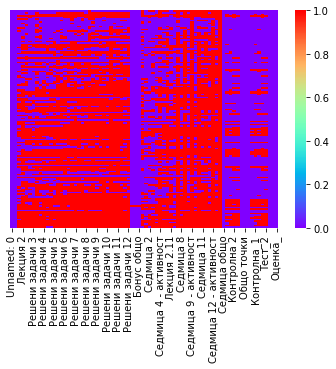

In [8]:
sns.heatmap(df.isnull(), cmap="rainbow", yticklabels=False)

Визуализираме всички null стойности в набора от данни

## Cleaning NaN values

In [9]:
df = df.replace(np.nan, 0) # Заменяме NaN данните с 0

<AxesSubplot:>

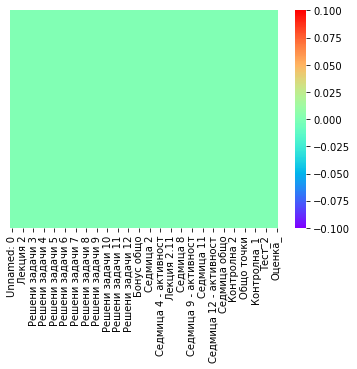

In [10]:
sns.heatmap(df.isnull(), cmap="rainbow", yticklabels=False)

$\bullet$ Няма null стойности след изчистването

## Removing unnecesary columns

In [11]:
df = df.drop(["Unnamed: 0"], axis=1)
df = df.drop(["Факултетен номер"], axis=1)
# Отстраняваме излишните колони

In [12]:
display(df) # Проверяваме дали процесът е бил успешен

,Лекция 1,Лекция 2,Лекция 3,Упражнение 3,Решени задачи 3,Лекция 4,Упражнение 4,Решени задачи 4,Лекция 5,Упражнение 5,...,Общо точки,Оценка,Крайна оценка,Контролна_1,Тест_1,Контролна_2,Тест_2,Бонус_,Общо_точки,Оценка_
0,1.0,1.0,1.0,1.0,0.50,1.0,1.0,1.0,1.0,1.0,...,52.772775,3,3.0,11.0,4.0,17.0,10.0,10.772775,52.772775,3
1,1.0,1.0,0.0,1.0,0.50,0.0,1.0,1.0,1.0,1.0,...,45.488650,2,3.0,12.0,10.0,6.0,12.5,8.990000,49.490000,3
2,1.0,1.0,1.0,1.0,0.75,0.0,0.0,0.0,0.0,0.0,...,10.284100,2,2.0,0.0,2.0,0.0,5.0,3.284100,10.284100,2
3,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.500000,2,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,2
4,1.0,1.0,1.0,0.0,0.50,1.0,1.0,1.0,1.0,1.0,...,31.727300,2,3.0,11.0,4.0,0.0,7.5,9.227300,31.727300,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.000000,2,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2
140,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,3.500000,2,3.0,2.0,0.0,0.0,0.0,1.500000,3.500000,2
141,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,7.500000,2,2.0,7.0,0.0,0.0,0.0,0.500000,7.500000,2
142,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.000000,2,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2


## Grades distribution

<AxesSubplot:xlabel='Оценка_', ylabel='count'>

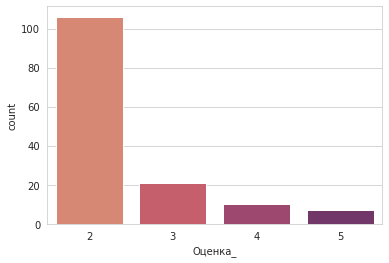

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Оценка_',data=df,palette='flare')

$\bullet$ Визуализираме съотношението между получените оценки и техният брой

## Points

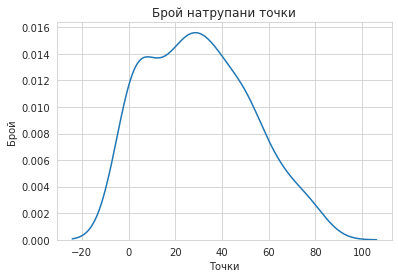

In [14]:
b = sns.kdeplot(df['Общо_точки'])
b.axes.set_title('Брой натрупани точки')
b.set_xlabel('Точки')
b.set_ylabel('Брой')
plt.show()

$\bullet$ Визуализираме броя натрупани точки

# Machine Learning Algorithms

$\bullet$ Разделяме данните на training и testing (75% и 25%)

$\bullet$ Добавяме random state, за да може при всяко изпълнение на кода, да получаваме идентично разделяне на данните

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df, df['Оценка_'], test_size = 0.25, random_state=42)

In [16]:
X_train.head()

,Лекция 1,Лекция 2,Лекция 3,Упражнение 3,Решени задачи 3,Лекция 4,Упражнение 4,Решени задачи 4,Лекция 5,Упражнение 5,...,Общо точки,Оценка,Крайна оценка,Контролна_1,Тест_1,Контролна_2,Тест_2,Бонус_,Общо_точки,Оценка_
111,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,43.090925,2,2.0,7.0,10.0,5.0,12.5,8.590925,43.090925,2
42,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.5,0.0,0.0,...,31.738675,2,3.0,8.0,6.0,0.0,2.5,15.238675,31.738675,2
118,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,17.227275,2,2.0,3.0,8.0,0.0,0.0,6.227275,17.227275,2
127,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4.409100,2,0.0,0.0,0.0,0.0,0.0,4.409100,4.409100,2
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.000000,2,2.0,0.0,8.0,0.0,0.0,1.000000,9.000000,2


## Mean Absolute Error & Root Mean Square Error

$\bullet$ Намираме медианата

$\bullet$ Създаваме списък със всички намерени медиани

$\bullet$ Запазваме стойността на оценката

In [17]:
prediction_median = X_train['Оценка_'].median()
predictions_median = [prediction_median for _ in range(len(X_test))]
real_grade = X_test['Оценка_']

$\bullet$ Функция за изчисляване на Mean Absolute Error и Root Mean Square Error

In [18]:
def prediction_evaluation(predictions, real_grade):
    mae = np.mean(abs(predictions - real_grade))
    rmse = np.sqrt(np.mean((predictions - real_grade) ** 2))
    
    return mae, rmse

$\bullet$ Визуализираме базовия сценарий

In [19]:
mb_mae, mb_rmse = prediction_evaluation(predictions_median, real_grade)
print('Median Baseline MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline MAE: 0.4444
Median Baseline RMSE: 0.9428


$\bullet$ Оценяваме всеки модел за машинно обучение като използваме данните за трениране и тестване

In [20]:
def evaluation(X_train, X_test, y_train, y_test):
    # Имена на моделите
    models_list = ['Linear Regression', 'Random Forest', 'ElasticNet Regression',
                       'Extra Trees', 'Gradient Boosted',
                       'Polynomial Regression', 'Baseline']
    
    X_train = X_train.drop('Оценка_', axis='columns')
    X_test = X_test.drop('Оценка_', axis='columns')
    
    # Инициализираме моделите
    model1 = LinearRegression()
    model2 = RandomForestRegressor(n_estimators=100)
    model3 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model4 = ExtraTreesRegressor(n_estimators=100)
    model5 = GradientBoostingRegressor(n_estimators=50)
    model6 = LinearRegression()
    
    # Запазваме резултатите в набор от данни
    results = pd.DataFrame(columns=['mae', 'rmse', 'vscore'], index = models_list)
    
    # Тренираме и прогнозираме, използвайки всеки модел поотделно
    for i, model, in enumerate([model1, model2, model3, model4, model5, model6]):
        if i == 5:
            poly = PolynomialFeatures(degree=2)
            train_x_poly = poly.fit_transform(X_train)
            model.fit(train_x_poly, y_train)
            
            test_x_poly = poly.transform(X_test)
            predictions = model.predict(test_x_poly)
            mae = np.mean(abs(predictions - y_test))
            rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
            vscore = r2_score(y_test, predictions)*100
            model_name = models_list[i]
            results.loc[model_name, :] = [mae, rmse, vscore]
            
        else:            
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
        
            mae = np.mean(abs(predictions - y_test))
            rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
            vscore = model.score(X_test, y_test)*100
        
            model_name = models_list[i]
            results.loc[model_name, :] = [mae, rmse, vscore]
    
    # Медиана на базов сценарий
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse, vscore]
    
    return results

In [21]:
results = evaluation(X_train, X_test, y_train, y_test)
results

,mae,rmse,vscore
Linear Regression,0.329737,0.45789,69.673649
Random Forest,0.015556,0.047376,99.675357
ElasticNet Regression,0.377142,0.474884,67.380914
Extra Trees,0.069722,0.151758,96.668795
Gradient Boosted,0.003266,0.004286,99.997343
Polynomial Regression,0.185657,0.278398,88.789358
Baseline,0.444444,0.942809,88.789358


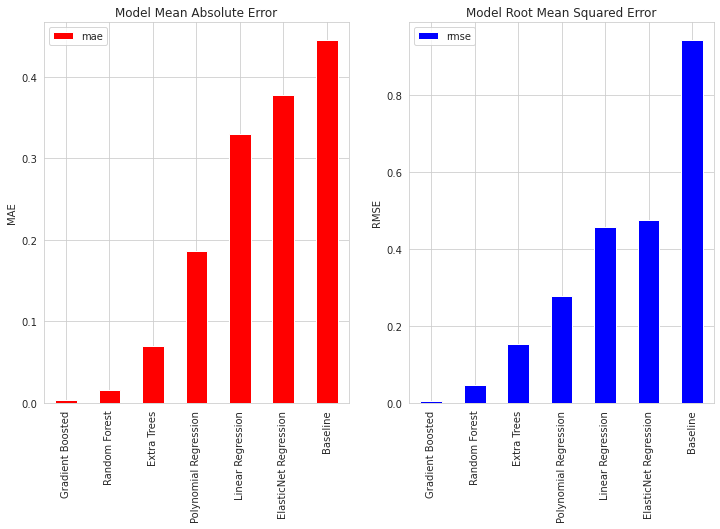

In [22]:
plt.figure(figsize=(12, 7))

ax = plt.subplot(1, 2, 1)
results.sort_values('mae', ascending=True).plot.bar(y = 'mae', color = 'red', ax = ax)
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')

ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending=True).plot.bar(y = 'rmse', color = 'blue', ax = ax)
plt.title('Model Root Mean Squared Error')
plt.ylabel('RMSE')

plt.show()

$\bullet$ Визуализираме MAE и RMSE

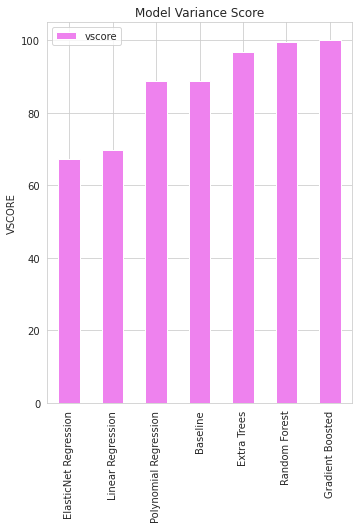

In [23]:
plt.figure(figsize=(12, 7))

ax = plt.subplot(1, 2, 1)
results.sort_values('vscore', ascending=True).plot.bar(y = 'vscore', color = 'violet', ax = ax)
plt.title('Model Variance Score')
plt.ylabel('VSCORE')

plt.show()

$\bullet$ Визуализираме точността на моделите за прогнозиране

# Извод

$\bullet$ От визуализацията на моделите виждаме, че Gradient Boosted моделът показва най-точни прогнози за оценка на студенти.